In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

from sivqed.models.siv import SiV
from sivqed.models.cavity import Cavity, CavitySiV

plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [8, 5]

In [23]:
w_arr = np.linspace(-50, 50, 1000)
w_arr_med = np.linspace(-150, 150, 5000)
w_arr_wide = np.linspace(-500, 500, 25000)

# Test of meaning of gamma

0.1999999999998181


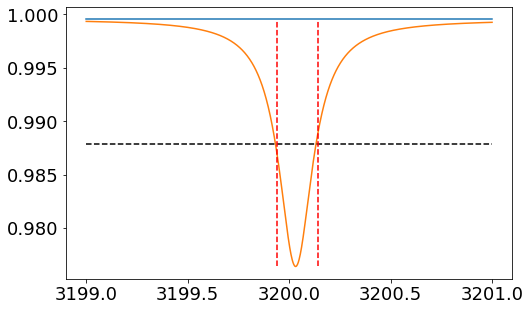

In [4]:
c = Cavity({"w_c" : 0, "k_in" : 60, "k_tot" : 80}, 
           {"w_up" : 3200., "g_up" : 10, "gamma_up" : 0.1})

w = np.linspace(3199, 3201, 1000)
plt.plot(w, c.reflectance(w, -1), label="empty")
plt.plot(w, c.reflectance(w, 1), label="up")
mn, mx = min(c.reflectance(w, 1)), max(c.reflectance(w, 1))
av = 0.5 * (mn + mx)

plt.plot([3199, 3201], [av, av], 'k--')
plt.plot([3199.94, 3199.94], [mn, mx], 'r--')
plt.plot([3200.14, 3200.14], [mn, mx], 'r--')

print(3200.14 - 3199.94)

Here the FWHM is 0.2 when gamma is set to 0.1! :) 

# Detuning variation for same SiV

(0.0, 1.0)

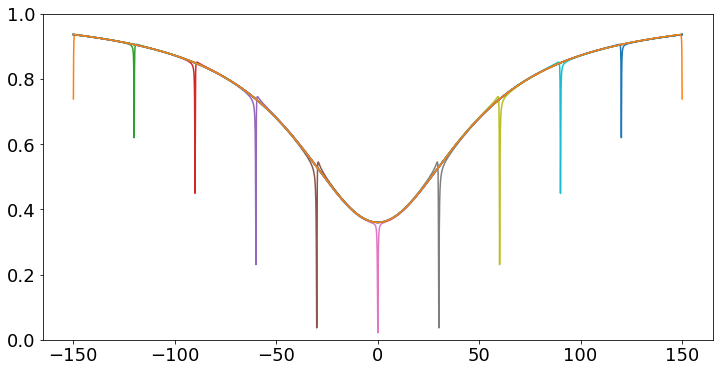

In [44]:
plt.figure(figsize=[12, 6])
c = Cavity({"w_c" : 0, "k_in" : 40, "k_tot" : 50}, 
           {"w_up" : 0., "g_up" : 2, "gamma_up" : 0.1})
plt.plot(w_arr_med, c.reflectance(w_arr_med, -1), label="empty")

for w_up in np.linspace(-150, 150, 11):
    c.set_qubit_params({"w_up": w_up})
    plt.plot(w_arr_med, c.reflectance(w_arr_med, 1), label="up")
plt.ylim([0, 1])